## Red Wine Classification

**Task:** Implementing a Neural Network using TF Estimator DNN Classifier and a Neural Network using TF.Keras on the Red Wine Quality dataset.

In [34]:
#import libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("../input/redWine/winequality-red.csv")
df.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides'
                , 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Exploratory Data Analysis

In [35]:
df.shape

(1599, 12)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [37]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [38]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [39]:
#Checking for missing data
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in our dataset.

<AxesSubplot:>

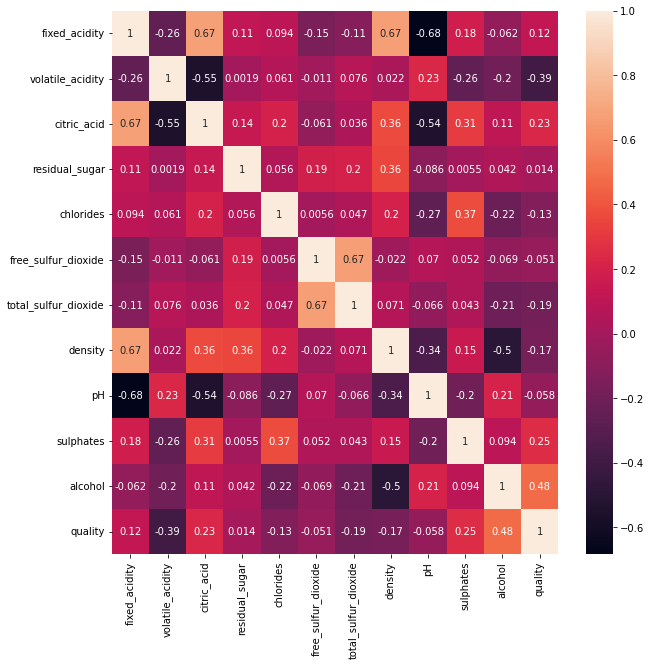

In [40]:
#correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

Exploring features using Histograms

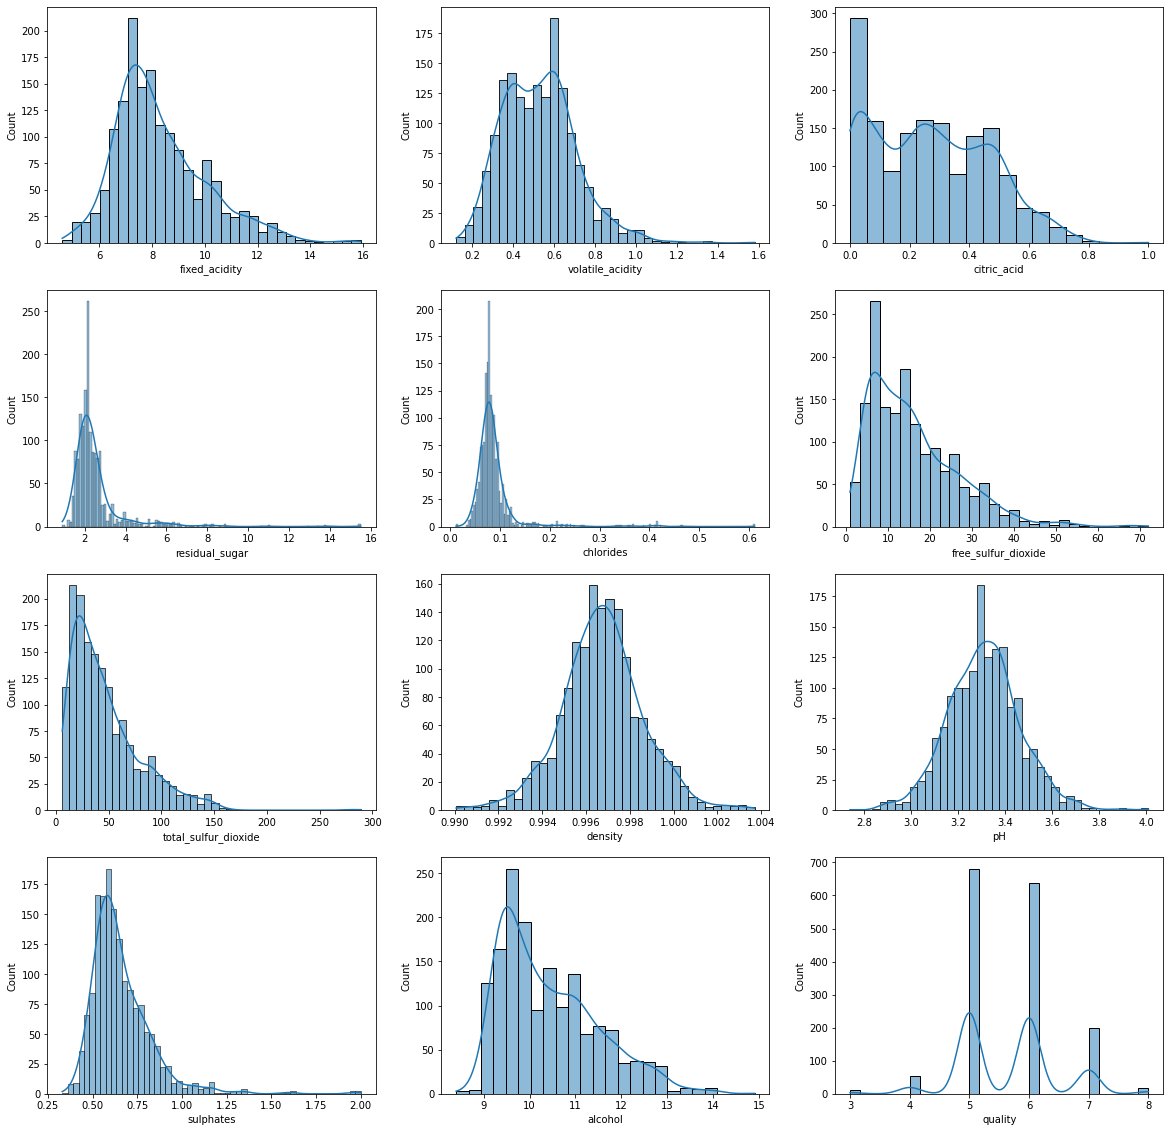

In [41]:
plt.figure(figsize = (20,20))
for i,col in enumerate(df.columns):
    plt.subplot(4,3,i+1)
    sns.histplot(x = col, kde = True, data = df)
plt.show()

According to the histogram plots above. We can observe that alcohol, total sulfur dioxide, free sulfur dioxide columns are skewed.

In [42]:
#separating features and target column
X = df.drop(["quality"], axis= "columns") # dropping the label variable (tip) from the data
y = df["quality"]


We will use Random Forest to analyse the important features

In [44]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=12)

df = pd.get_dummies(df)
model.fit(X, df.quality)
display(model.feature_importances_)
feat = df.columns

imp = model.feature_importances_
indices = np.argsort(imp)[:]

array([0.05049791, 0.13604892, 0.04475298, 0.05247952, 0.05881777,
       0.0458654 , 0.07643178, 0.0515247 , 0.05821171, 0.14268737,
       0.28268191])

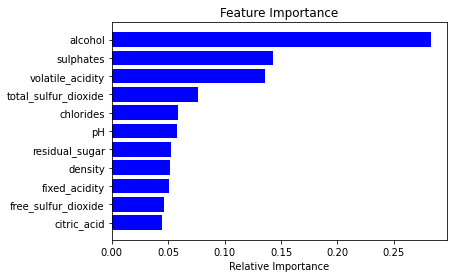

In [45]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feat[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The top features that affect the quality of wine are Alcohol, Suplhates and Volatile Acidity and the least important features include fixed acidity, free sulphur dioxide and citiric acid, so I'll remove the least important features.

In [46]:
del X['fixed_acidity']
del X['free_sulfur_dioxide']
del X['citric_acid']
X

,volatile_acidity,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.700,1.9,0.076,34.0,0.99780,3.51,0.56,9.4
1,0.880,2.6,0.098,67.0,0.99680,3.20,0.68,9.8
2,0.760,2.3,0.092,54.0,0.99700,3.26,0.65,9.8
3,0.280,1.9,0.075,60.0,0.99800,3.16,0.58,9.8
4,0.700,1.9,0.076,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...
1594,0.600,2.0,0.090,44.0,0.99490,3.45,0.58,10.5
1595,0.550,2.2,0.062,51.0,0.99512,3.52,0.76,11.2
1596,0.510,2.3,0.076,40.0,0.99574,3.42,0.75,11.0
1597,0.645,2.0,0.075,44.0,0.99547,3.57,0.71,10.2


In [47]:
#preparing our target column for training
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df.iloc[: , -1])
y = pd.DataFrame(y.reshape(len(y),1))

In [48]:
#splitting our dataset into train and test
from sklearn.model_selection import train_test_split
#Splitting the dataset to train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
import tensorflow as tf
import itertools
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


I used to_categorical from tf.keras.utils library so as to prepare the target variable for the Neural Network model when using TF.Keras

In [50]:
y_train_cat = tf.keras.utils.to_categorical(y_train, 6)
y_test_cat = tf.keras.utils.to_categorical(y_test, 6)

In [52]:
X.columns

Index(['volatile_acidity', 'residual_sugar', 'chlorides',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

### Implementing Neural Network using TF Estimator DNN Classifier

In [53]:
def create_feature_column():
    feat_volatile_acidity = tf.feature_column.numeric_column('volatile_acidity')
    feat_residual_sugar = tf.feature_column.numeric_column('residual_sugar')
    feat_chlorides = tf.feature_column.numeric_column('chlorides')
    feat_total_sulfur_dioxide  = tf.feature_column.numeric_column('total_sulfur_dioxide')
    feat_density = tf.feature_column.numeric_column('density')
    feat_pH = tf.feature_column.numeric_column('pH')
    feat_sulphates = tf.feature_column.numeric_column('sulphates')
    feat_alcohol = tf.feature_column.numeric_column('alcohol')


    feature_column = [ feat_volatile_acidity, feat_residual_sugar, feat_chlorides, 
                       feat_total_sulfur_dioxide,feat_density,feat_pH,feat_sulphates,feat_alcohol] 

    return feature_column
feature_column = create_feature_column()


In [54]:
def traineval(X_train, y_train, training=False, batch_size=64):
    """An input function for training or evaluating"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(X_train), y_train))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()

    return dataset.batch(batch_size)

def predict_fn(X_train, batch_size=64):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(X_train)))
    return dataset.batch(batch_size)

In [55]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in df.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

In [56]:
dnn = tf.estimator.DNNClassifier(hidden_units = [20,20,20],
                                      feature_columns = feature_column,
                                      n_classes= 6,
                                      activation_fn=tf.nn.relu,
                                      dropout=None)

In [57]:
# Train the Model.
dnn.train(input_fn=lambda: traineval(X_train, y_train, training=True), steps=5000)



In [58]:
eval_result = dnn.evaluate(
    input_fn=lambda: traineval(X_test, y_test))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))


Test set accuracy: 0.506



In [59]:
print(eval_result)

{'accuracy': 0.50625, 'average_loss': 1.1573135, 'loss': 1.1573135, 'global_step': 5000}


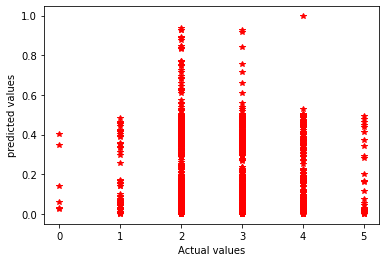

In [60]:
import numpy as np
predictions=[]
for pred in dnn.predict(input_fn=lambda: predict_fn(X_test)):
    predictions.append(np.array(pred['probabilities']).astype(float))
    
plt.plot(y_test, predictions, 'r*')
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.show()

### Implementing Neural Network using TF.Keras

In [63]:
nn = tf.keras.models.Sequential(layers = None , name = None)
nn.add(tf.keras.layers.Input(shape = 8,))
nn.add(tf.keras.layers.Dense(units = 16, activation = "relu" ))
nn.add(tf.keras.layers.Dense(units = 8, activation = "relu" ))
nn.add(tf.keras.layers.Dense(units = 6, activation = "sigmoid"))
nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 54        
Total params: 334
Trainable params: 334
Non-trainable params: 0
_________________________________________________________________


In [64]:
nn.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics= ['accuracy'])
history = nn.fit(X_train, y_train_cat,  batch_size= 32, epochs = 150, validation_data = (X_test,y_test_cat))

Epoch 1/150
40/40 [==============================] - 1s 7ms/step - loss: 1.9168 - accuracy: 0.4527 - val_loss: 1.3912 - val_accuracy: 0.4781
Epoch 2/150
40/40 [==============================] - 0s 3ms/step - loss: 1.2691 - accuracy: 0.4636 - val_loss: 1.2951 - val_accuracy: 0.4781
Epoch 3/150
40/40 [==============================] - 0s 3ms/step - loss: 1.2162 - accuracy: 0.4715 - val_loss: 1.2841 - val_accuracy: 0.4625
Epoch 4/150
40/40 [==============================] - 0s 3ms/step - loss: 1.1930 - accuracy: 0.4769 - val_loss: 1.2525 - val_accuracy: 0.4938
Epoch 5/150
40/40 [==============================] - 0s 3ms/step - loss: 1.1809 - accuracy: 0.4840 - val_loss: 1.2499 - val_accuracy: 0.4625
Epoch 6/150
40/40 [==============================] - 0s 3ms/step - loss: 1.1748 - accuracy: 0.4808 - val_loss: 1.2286 - val_accuracy: 0.4750
Epoch 7/150
40/40 [==============================] - 0s 3ms/step - loss: 1.1728 - accuracy: 0.4699 - val_loss: 1.2102 - val_accuracy: 0.5125
Epoch 8/150
4

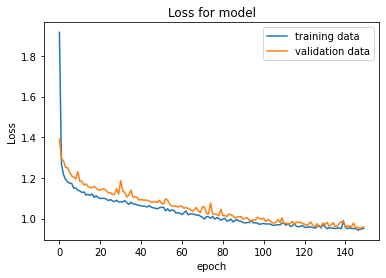

In [65]:
#Here we plot the loss vs Validation loss using a line graph.
plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.legend()
plt.title('Loss for model')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

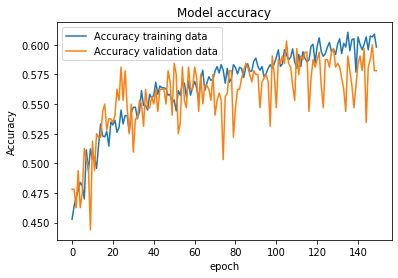

In [66]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

## Conclusion

Looking at both models above, we can observe that the Neural Network with TF.Keras has a better overall accuracy than the DNN Classifier Model. Although both models didn't do an excellent job in prediction with DNN Classifier having accuracy of 0.506 and average loss of 1.16. While NN with TF.Keras peaked at an accuracy of 0.600 and a loss of 0.95. In conclusion, The TF.Keras model performed better on the dataset.